# Practice Lab

In [6]:
! rm C2_W2_Assignment.tar ; tar -vcf C2_W2_Assignment.tar *

a C2_W2_Assignment.ipynb
a autils.py
a data
a data/X.npy
a data/y.npy
a deeplearning.mplstyle
a images
a images/C2_W2_SoftMaxCost.png
a images/C2_W2_Assigment_NN.png
a images/C2_W2_smallnetwork.png
a images/C2_W2_SoftmaxReg_NN.png
a images/C2_W2_BinaryVsMultiClass.png
a images/C2_W2_NNSoftmax.PNG
a images/C2_W2_ReLu.png
a images/C2_W2_Softmax.png
a images/C2_W2_SoftMaxNN.png
a lab_utils_common.py
a lab_utils_softmax.py
a logs
a logs/train
a logs/train/events.out.tfevents.1645828646.ed92f2b0de47.31.186.v2
a logs/train/plugins
a logs/train/events.out.tfevents.1647805546.30f1e0ee4ffd.31.186.v2
a logs/train/events.out.tfevents.1645828646.ed92f2b0de47.profile-empty
a logs/train/plugins/profile
a logs/train/plugins/profile/2022-02-25_22-37-26
a logs/train/plugins/profile/2022-03-20_19-45-46
a logs/train/plugins/profile/2022-03-20_19-45-46/local.trace
a logs/train/plugins/profile/2022-02-25_22-37-26/local.trace
a public_tests.py


In [7]:
from IPython.display import display, FileLink

local_file = FileLink('./C2_W2_Assignment.tar', result_html_prefix="Click here to download: ")
display(local_file)

/Users/alyssajuarez/GitHub/DATA-3461/labs/Lab.3/C2_W2_Assignment/C2_W2_Assignment.tar

# Part 1

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

# Part 2

# Part 3

# EX 1

In [15]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z)
    a = exp_z / sum_exp_z
    ### END CODE HERE ### 
    return a

In [25]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


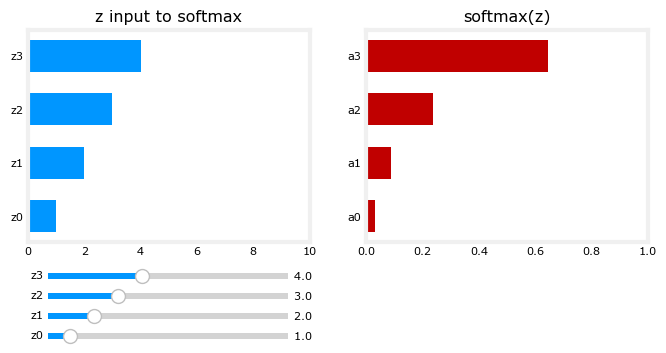

In [26]:
plt.close("all")
plt_softmax(my_softmax)

# Part 4

In [28]:
# load dataset
X, y = load_data()

In [29]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [30]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [31]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


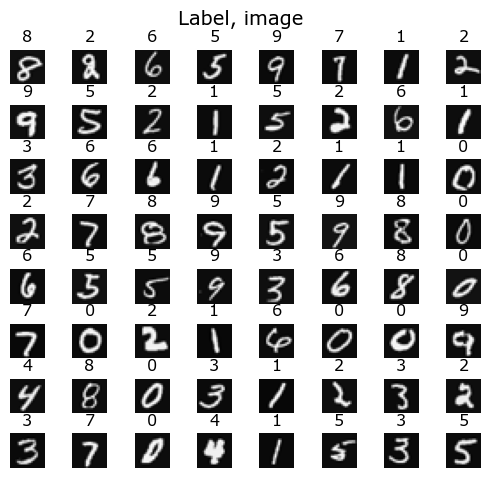

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# EX 2

In [33]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),    #specify input shape
        layers.Dense(25, activation="relu", name="layer1"), 
        layers.Dense(15, activation="relu", name="layer2"),  
        layers.Dense(10, activation="linear", name="layer3"),
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [34]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [35]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


In [36]:
[layer1, layer2, layer3] = model.layers

In [37]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [38]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 349us/step - loss: 1.4814
Epoch 2/40
157/157 [==============================] - 0s 339us/step - loss: 0.6204
Epoch 3/40
157/157 [==============================] - 0s 347us/step - loss: 0.4398
Epoch 4/40
157/157 [==============================] - 0s 342us/step - loss: 0.3545
Epoch 5/40
157/157 [==============================] - 0s 348us/step - loss: 0.3084
Epoch 6/40
157/157 [==============================] - 0s 340us/step - loss: 0.2712
Epoch 7/40
157/157 [==============================] - 0s 338us/step - loss: 0.2450
Epoch 8/40
157/157 [==============================] - 0s 333us/step - loss: 0.2248
Epoch 9/40
157/157 [==============================] - 0s 330us/step - loss: 0.2121
Epoch 10/40
157/157 [==============================] - 0s 322us/step - loss: 0.1895
Epoch 11/40
157/157 [==============================] - 0s 318us/step - loss: 0.1771
Epoch 12/40
157/157 [==============================] - 0s 334us/step - loss: 0.1647
E

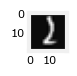

1/1 [==============================] - 0s 28ms/step
 predicting a Two: 
[[-8.75  3.27  6.68  1.34 -8.84 -7.33 -3.84  0.35 -1.78 -4.99]]
 Largest Prediction index: 2


In [39]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [40]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.93e-07 3.18e-02 9.62e-01 4.62e-03 1.76e-07 7.96e-07 2.62e-05 1.72e-03
  2.04e-04 8.28e-06]]
Total of predictions: 1.000


In [41]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 7ms/step


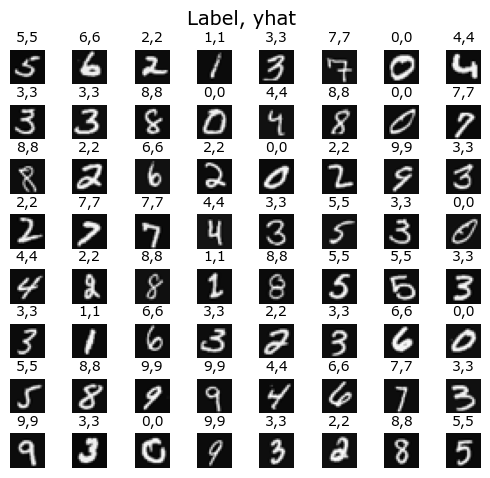

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 7ms/step
11 errors out of 5000 images


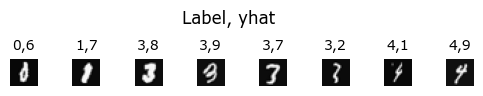

In [44]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")